In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Check for NA in train

def check_na(df):
    for col in df.columns:
        na_count = df[col].isna().sum()
        if na_count > 0:
            print('"{}" has {} empty records'.format(col, na_count))

print('# Check for NA in train')
check_na(df_train)

print('\n# Check for NA in test:')
check_na(df_test)

# Check for NA in train
"Age" has 177 empty records
"Cabin" has 687 empty records
"Embarked" has 2 empty records

# Check for NA in test:
"Age" has 86 empty records
"Fare" has 1 empty records
"Cabin" has 327 empty records


In [5]:
# Remove useless columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

train = df_train.drop(columns_to_drop, axis=1)
test = df_test.drop(columns_to_drop, axis=1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# Fix missing values and categoricals
def fix_na_catericals(df):
    df['Sex'] = df['Sex'].map(lambda s: s == 'male' if 1 else 0 ).astype(int)
    df['Embarked'].fillna('X', inplace=True)
    df['Embarked'] = df['Embarked'].astype('category')
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    return df

train = fix_na_catericals(train)
test = fix_na_catericals(test)

In [7]:
train[train.Embarked.notnull() == False]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [8]:
# Convert Embarked from Categories type to numeric
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

y = LabelEncoder.fit_transform(train['Embarked'])
train['Embarked'] = y

z = LabelEncoder.fit_transform(test['Embarked'])
test['Embarked'] = z

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


3    491
1    216
2    184
Name: Pclass, dtype: int64


C:\Users\Tulio\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


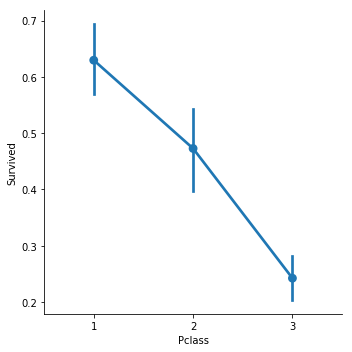

In [9]:
print(train.Pclass.value_counts(dropna=False))
sns.factorplot('Pclass', 'Survived',data=train, order=[1,2,3])

In [19]:
#plt.matshow(train.corr())
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

#plot_corr(train.corr())
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


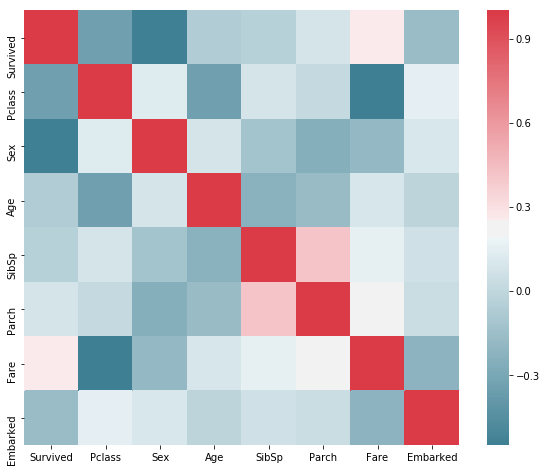

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [10]:
# Split the X and the Y

# Remove column 'Survived'
#test_X = test.loc[:, test.columns != 'Survived']
#test_y = test.loc[:, test.columns == 'Survived']

train_X = train.loc[:, train.columns != 'Survived']
train_y = train.loc[:, train.columns == 'Survived']

print(train_X.columns)
print(train_y.columns)
train_X.dtypes

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Index(['Survived'], dtype='object')


Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [11]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.0 KB


In [12]:
from sklearn.linear_model import LogisticRegression

# Train
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

C:\Users\Tulio\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# Test
preds = logreg.predict(train_X)
print('Accuracy: {}%'.format(logreg.score(train_X, train_y) * 100 ))

Accuracy: 80.3591470258137%


In [82]:
train_y.isna().sum()

Survived    0
dtype: int64